In [1]:
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [3]:
BTC_USD = yf.download("BTC-USD", start='2020-01-01', end='2020-12-31', interval='1d')
BTC_USD.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


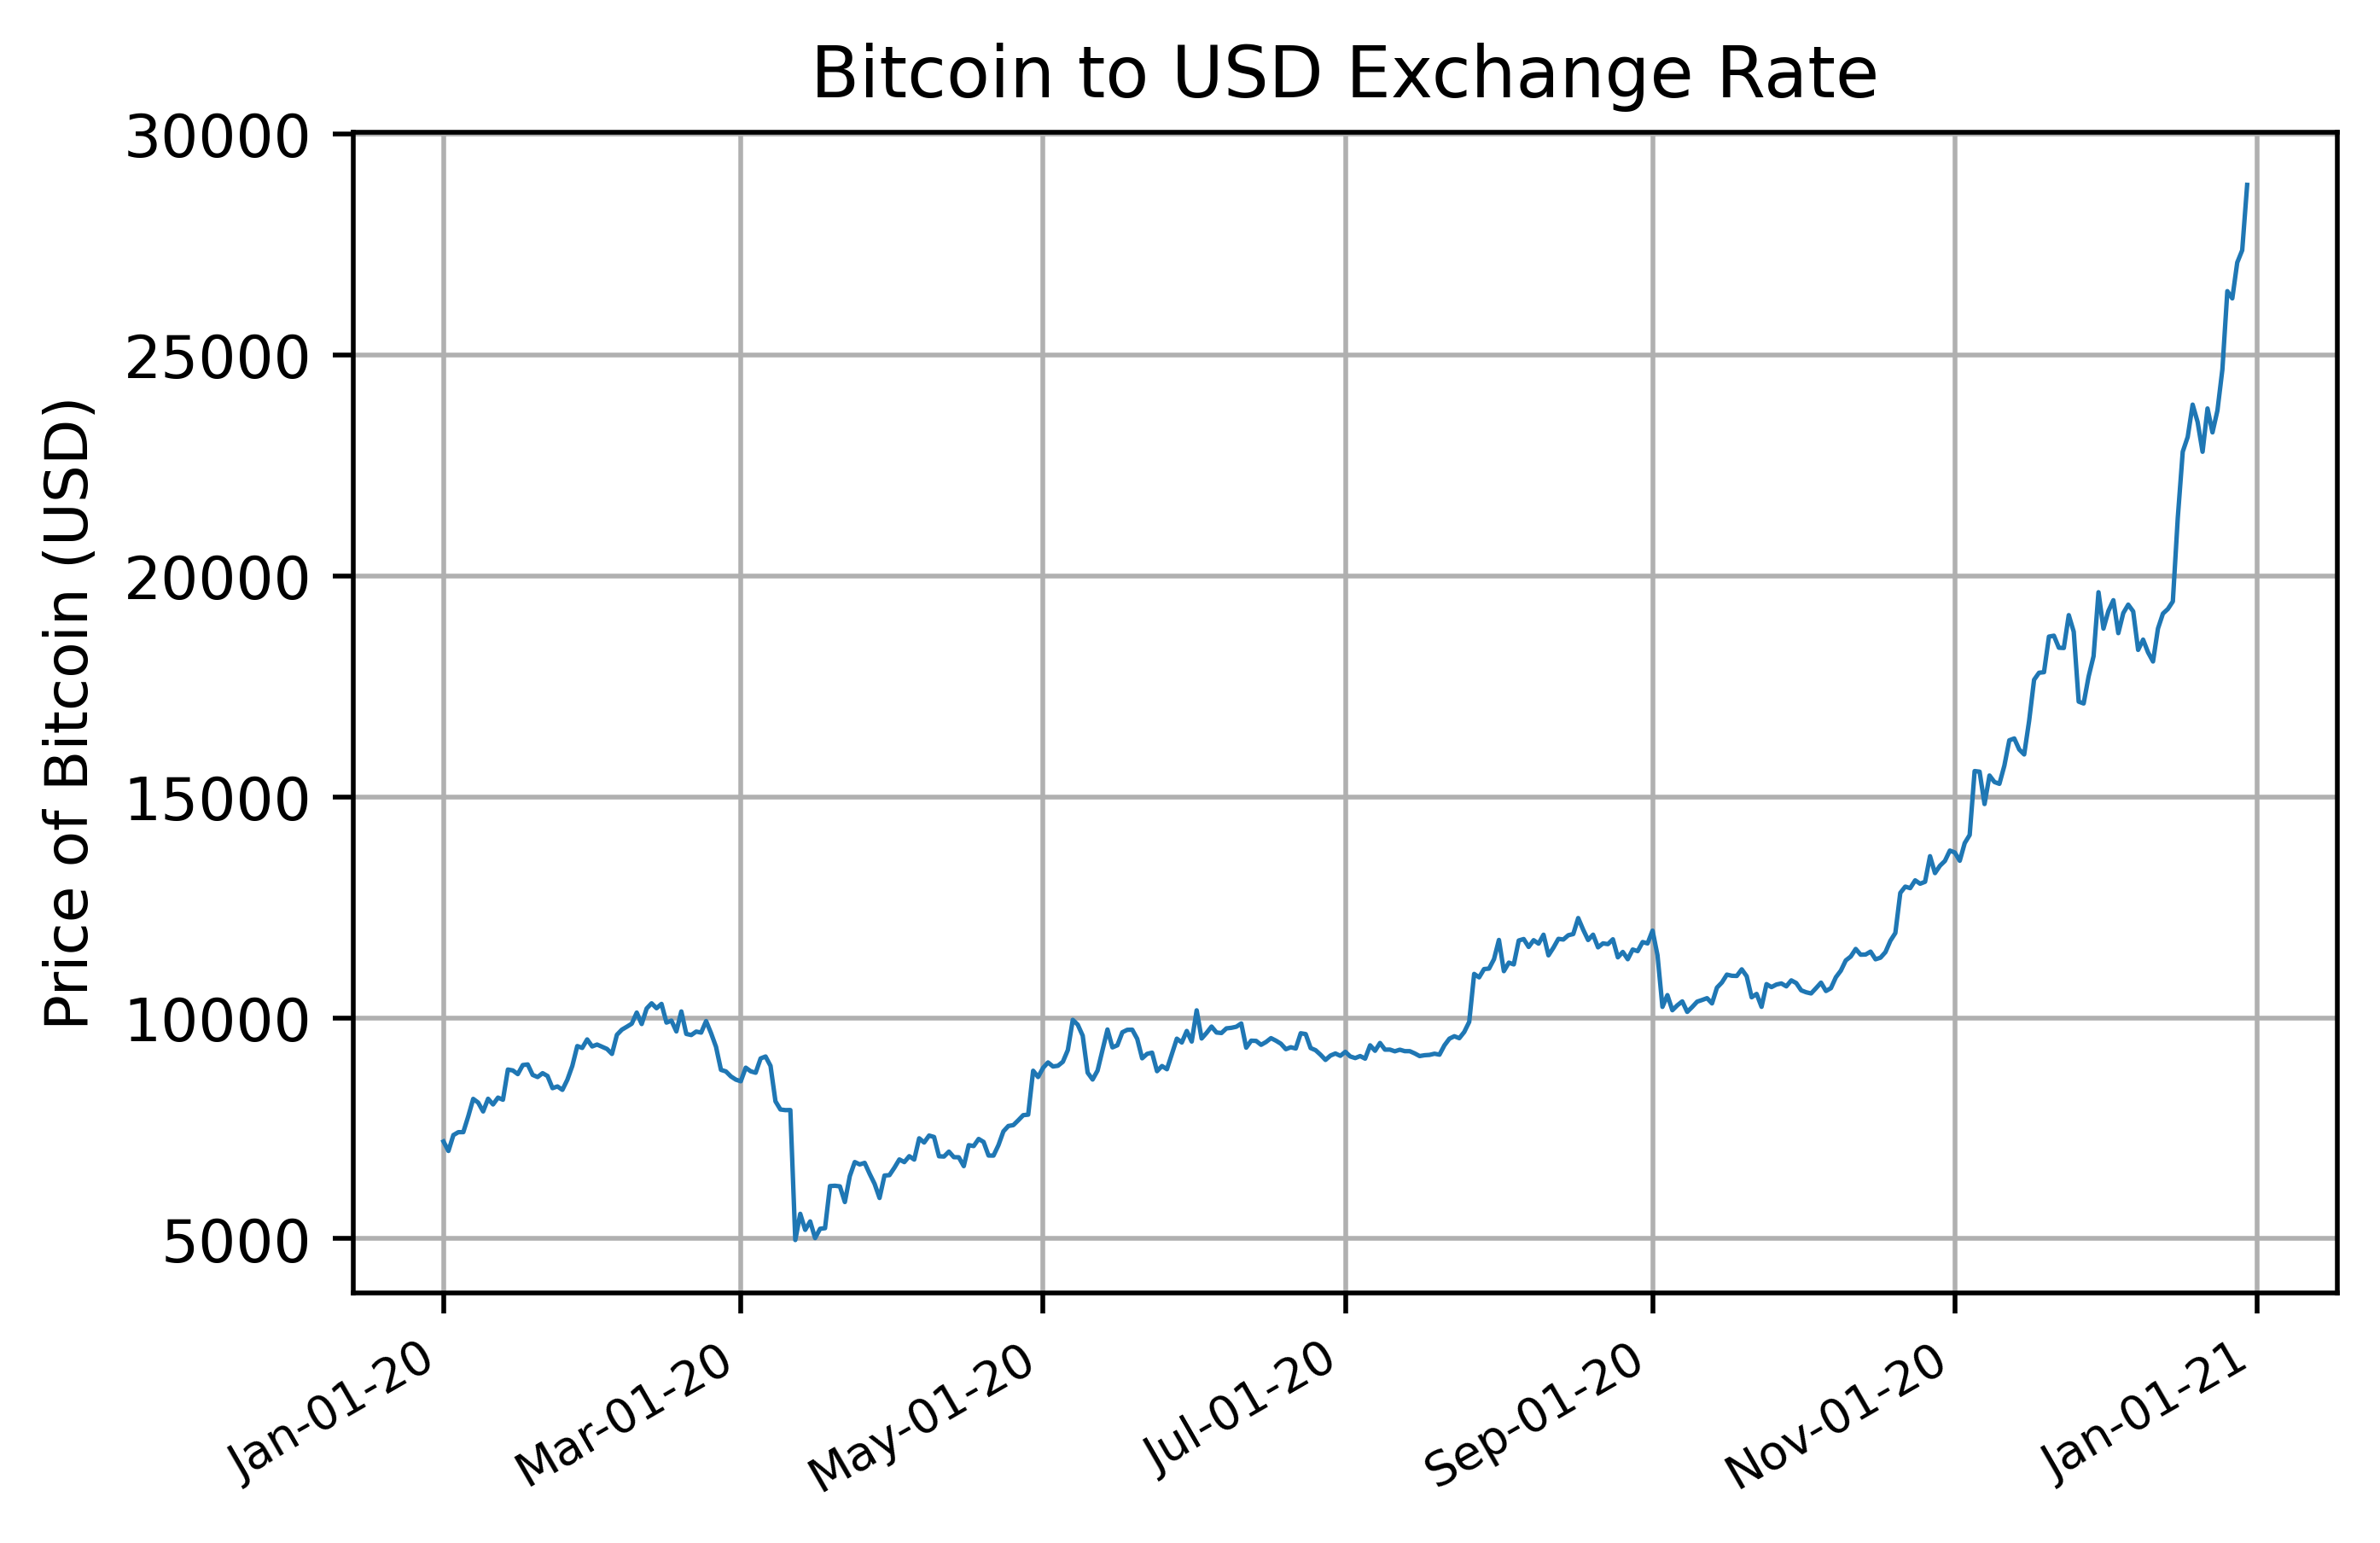

In [4]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75)

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid

# Displaying the price chart
plt.show()

In [5]:
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

In [6]:
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_9
Date,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,7200.174316
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,7092.822266
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,7176.842936
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,7235.296387
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,7270.500586


In [7]:
BTC_USD['SMA_30']=BTC_USD['Close']

In [8]:
# Display the last 5 entries of the dataframe
BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2020-12-26,24677.015625,26718.070312,24522.689453,26437.037109,26437.037109,48332647295,23905.591363,26437.037109
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605,24253.850694,26272.294922
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893,24611.070312,27084.808594
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774,25042.752821,27362.437500
2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704,25713.627387,28840.953125


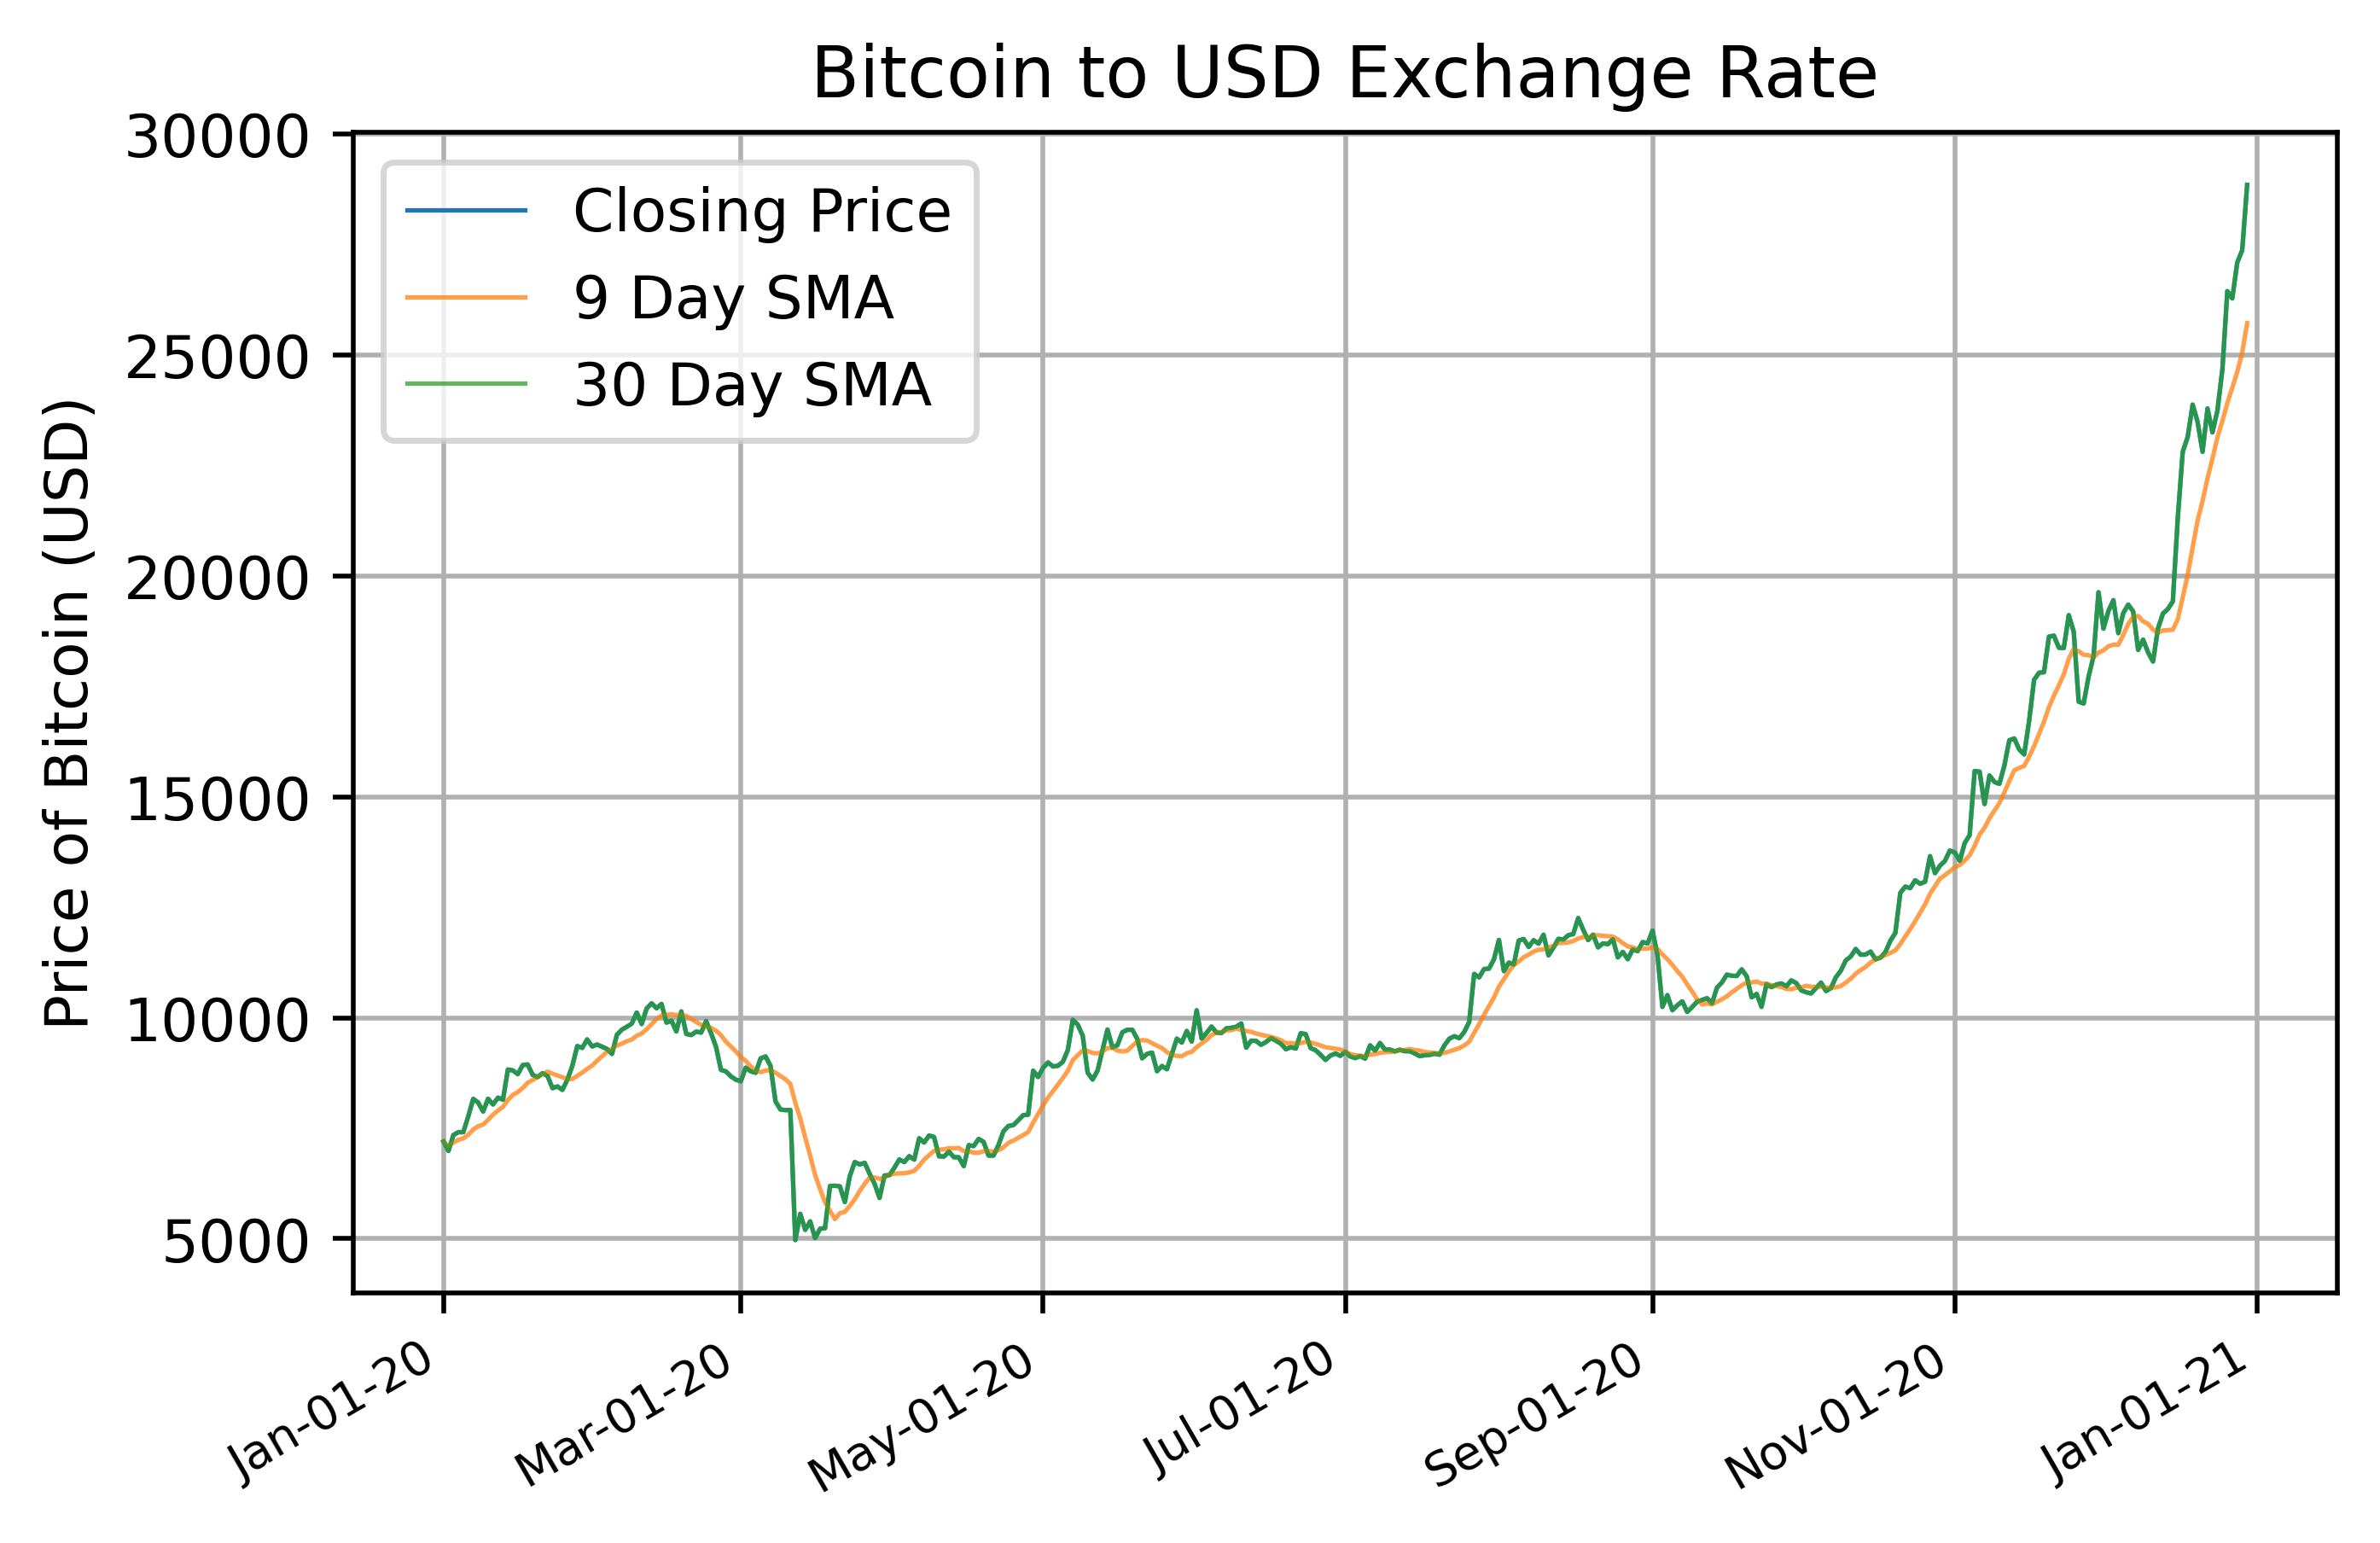

In [9]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

"""
You have already seen the code above earlier - we are simply reusing it.
Below we plot the 9 and 30 day Simple Moving Averages and give them the appropriate label
"""
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

#One of the simplest trading strategies making use of Simple Moving Averages is the Moving Average Crossover. 
#The basic idea behind this strategy is to use two Simple Moving Averages - one with a relatively short sampling 
#interval and the other with a longer interval. When the shorter moving average crosses over the longer interval moving average, it can signal a reversal in trend. 
#For example, if the shorter term moving average is below the longer moving average but then crosses over to the top of it, 
#this may signal the beginning of an upwards (bullish) trend. Using the Moving Average Crossover strategy, this would be a buy signal. 
#Similarily, when the shorter moving average is above the longer interval one and it crosses under, this could signal a downward (bearish) trend, which would be a sell signal in this strategy.

In [10]:
`

# Create a pandas dataframe that is the same size as the BTC_USD dataframe and covers the same dates
trade_signals = pd.DataFrame(index=BTC_USD.index)

# Define the intervals for the Fast and Slow Simple Moving Averages (in days)
short_interval = 10
long_interval = 40

# Compute the Simple Moving Averages and add it to the dateframe as new columns
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()



Now we have a dataframe containing the dates we're interested in and two Simple Moving Averages, one with a short interval and the other with a longer sampling interval. This gives us the information we need to figure out where the two Moving Averages cross, which is the core of this trading strategy. Let's create a new column called Signal that is populated everywhere with zeros, except for a one wherever the two Moving Averages cross.

In [11]:
# Create a new column populated with zeros
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)   

The two lines of code you executed above give us a column called `Signal`. At every date where the short-term moving average is above the long-term moving average for at least a period of time equal to `short_interval`, the value is 1.0 and 0.0 elsewhere. This is great information but we're not quite yet done. We're interested in determining at what point we should actually buy and sell our Bitcoin.

According to our *Moving Average Crossover* strategy, we want to buy when the short-term SMA crosses the long-term SMA from below, and sell when it crosses over from above. We can easily use the `Signal` column in the `trade_signals` dataframe to determine where exactly these events occur. If the `Signal` column has value 0.0 on a given date then switches to 1.0, this means the short-term SMA crossed the long-term SMA from *below* - this is our time to **buy** Bitcoin according to our strategy. On the other hand, if the value goes from 1.0 to 0.0, that tells us the short-term SMA was *above* the long-term SMA and then crossed over - this is our time to **sell**.

Let's create a new column in the dataframe called `Positions`, where for each date in the dataframe it will tell the algorithm which action to take. A value of 1.0 will represent a *buy* order, a -1.0 will be a *sell* order, and a value of 0.0 will tell the algorithm to take no action. To compute these values from the `Signal` column, the `diff()` method from the pandas library will prove extraordinarily useful. The [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsanalyzecryptomarketswiththecoinbaseapi28469139-2022-01-01) for this method tells us that it calculates the difference of a Dataframe element compared with another element in the Dataframe, with the default being the element in the previous row.

Using this method, we can easily compute the action the algorithm should take at each step. Suppose the short-term SMA is below the long-term SMA. Then for that period, the `Signal` column will have the value 0. Then suppose we have a crossing, such that the short-term SMA now moves above the long-term one. Then the `Signal` column will now have value 1.0 and so the `diff()` method will compute the difference between the `Signal` value that day and the one before, i.e., $1 - 0 = 1$, thus giving us a `Positions` value of 1 for that day (i.e., a **buy** order). The opposite scenario occurs when the short-term SMA crosses back underneath the long-term SMA. the `diff()` method assigns a value of $0 - 1 = -1$ to the `Position` column on the day of the crossing (i.e., a **sell** order). On the days where there is no crossing, each consecutive day has the same value in the `Signal` column, so the `diff()` method assigns a value of 0 to the `Position` column.

<br>

Phew! That was a lot of reading, let's go ahead and actually do it. Luckily all that thinking and computation is condensed into one simple line of code.

In [13]:
# Enter your code below and run the cell

trade_signals['Position']=trade_signals['Signal'].diff()

trade_signals.head()

,Short,Long,Signal,Position
Date,,,,
2020-01-01,7200.174316,7200.174316,0.0,NaN
2020-01-02,7092.822266,7092.822266,0.0,0.0
2020-01-03,7176.842936,7176.842936,0.0,0.0
2020-01-04,7235.296387,7235.296387,0.0,0.0
2020-01-05,7270.500586,7270.500586,0.0,0.0


Let's make a plot to visualize the algorithm's trades before going into more detail and analyzing its performance quantiatively. You will plot the closing price and the two Simple Moving Averages you computed as part of the trading strategy. Furthermore, where the trading algorithm decides to make a buy order, we will plot an upwards facing green arrow. Where the algorithm places a sell order, we will plot a downwards facing red arrow.

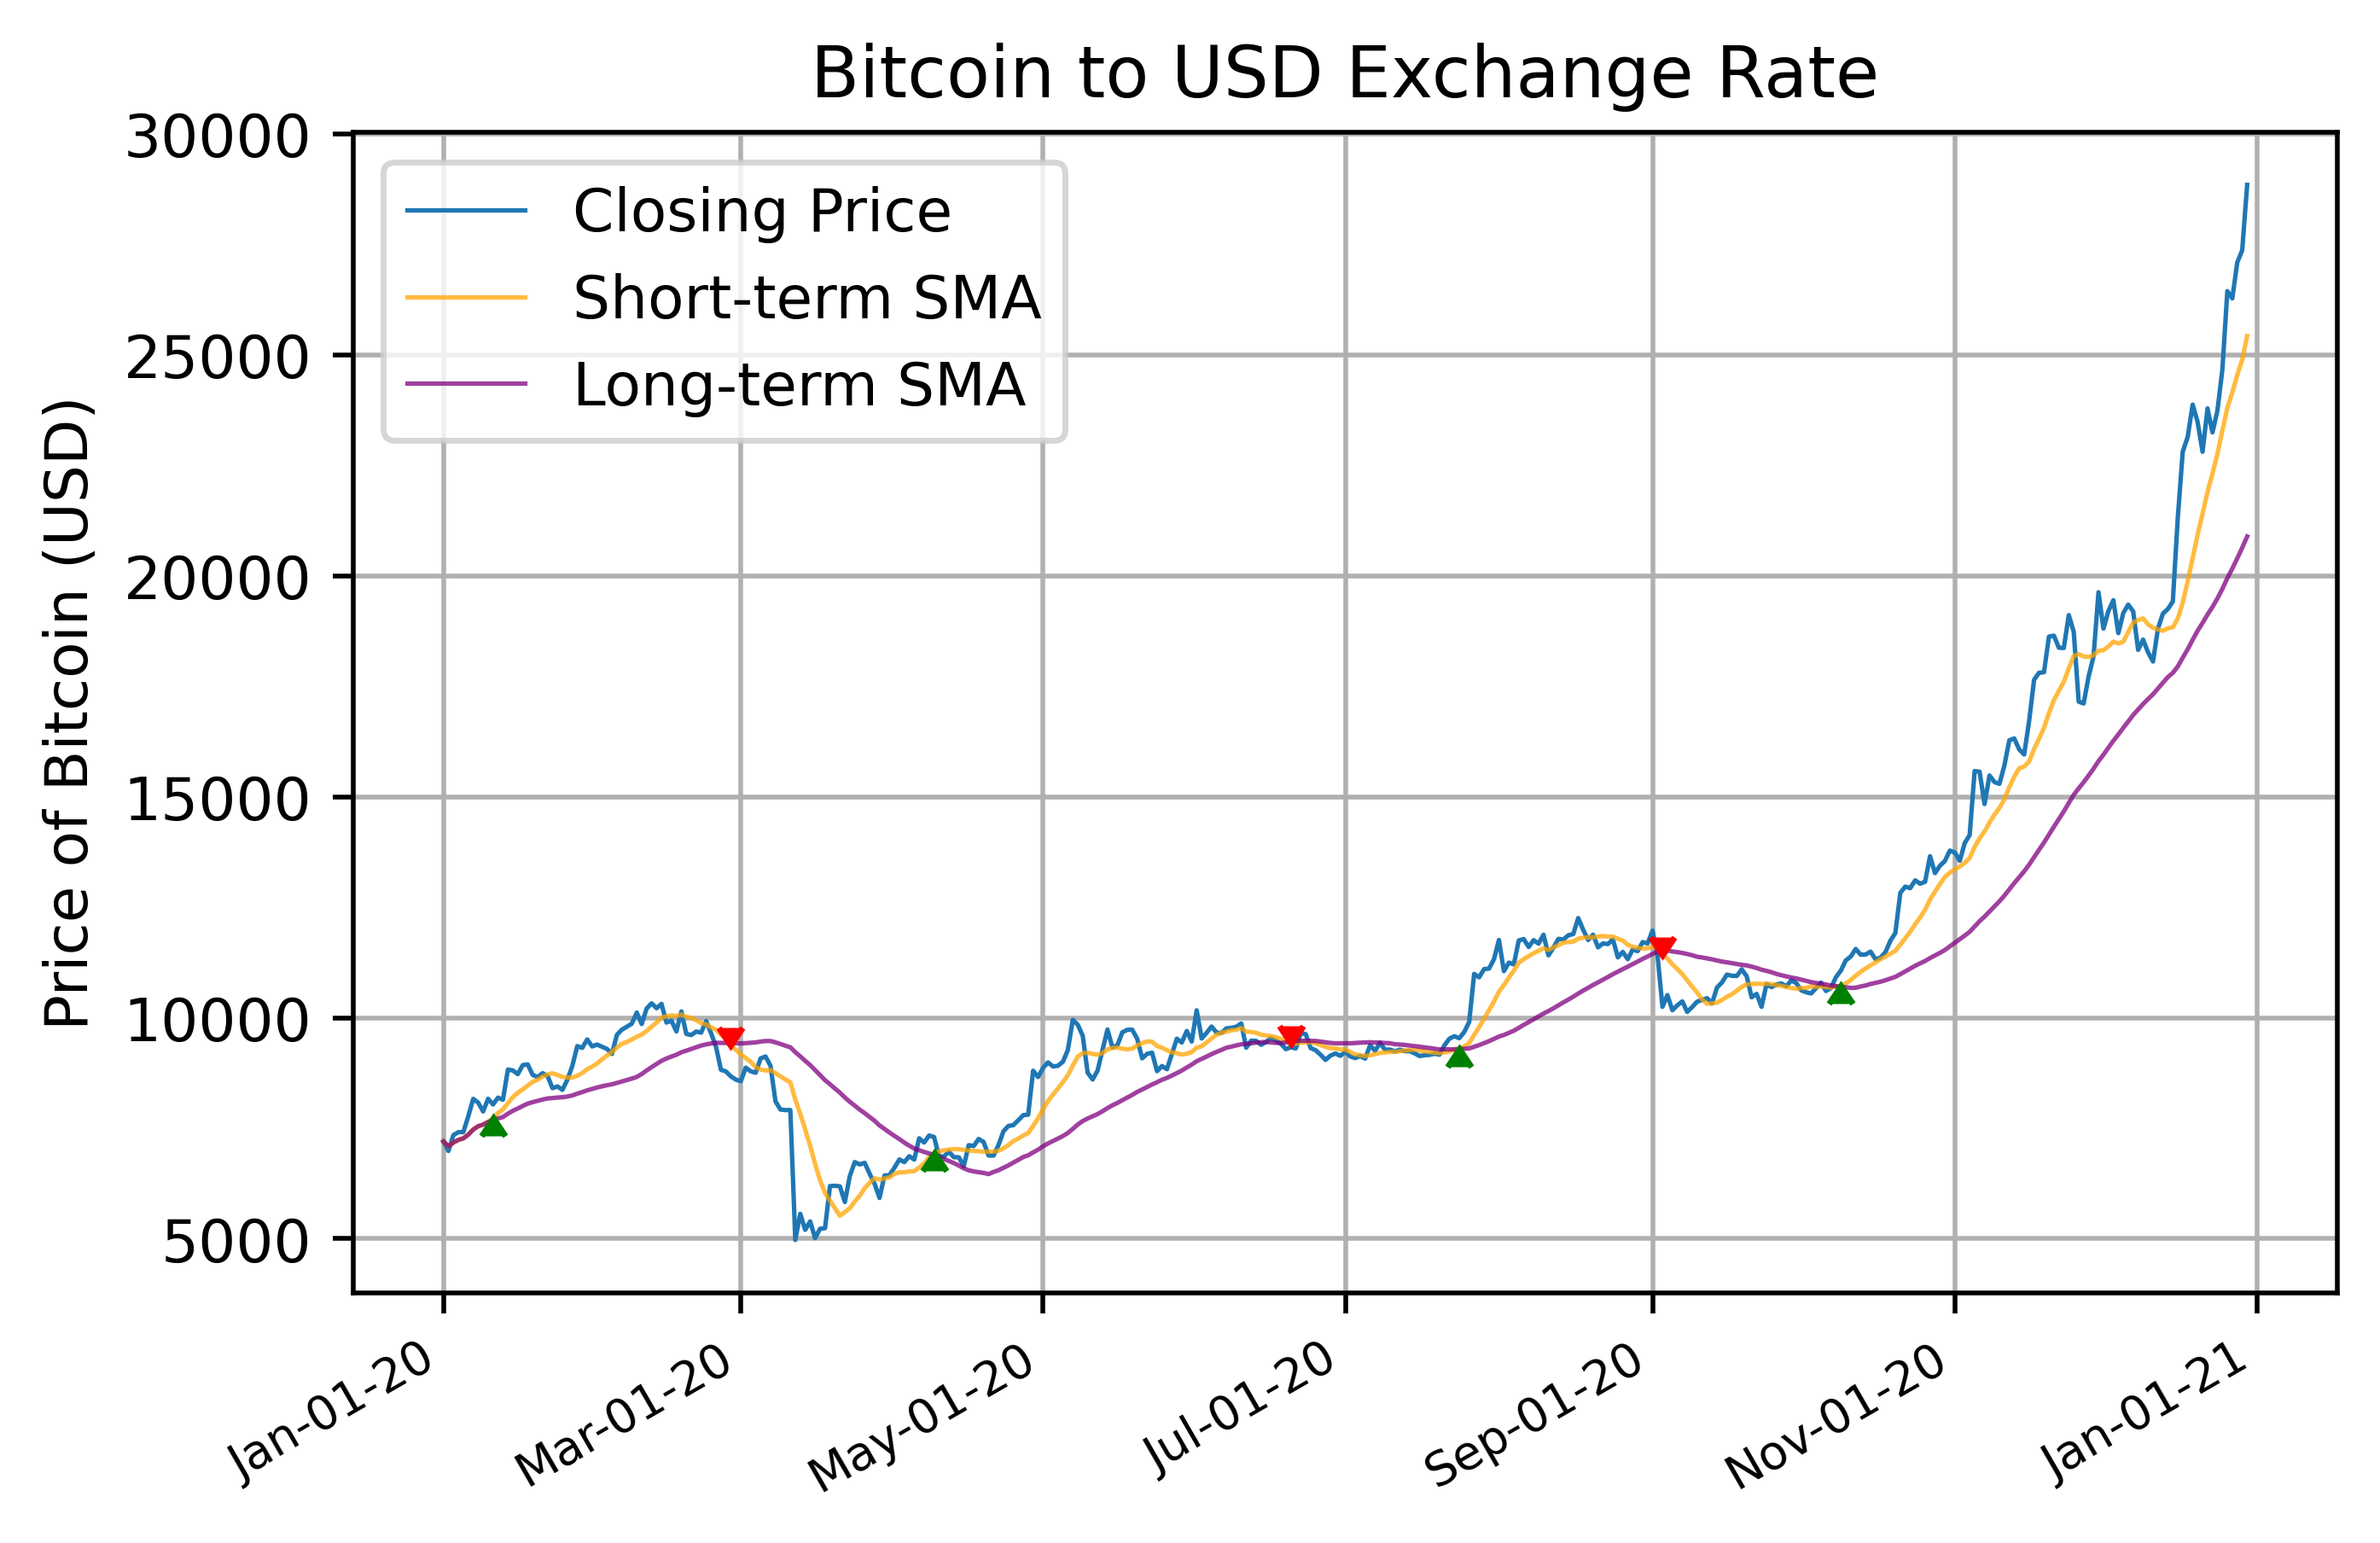

In [14]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

Once you have a trading algorithm implemented, you will certainly want to test it to see if it can actually produce a profit and compare its performace with other strategies. Often, the first way to do this is to perform a backtest. The core idea behind a backtest is to simulate running your trading algorithm on historical data and compute several metrics, such as the return. While this method certainly does not guarantee that the algorithmn will be consistently profitable, it's a quick way to test the viability of a strategy and reject clearly unfeasable strategies.

Let's do a simple backtest over the 2020 BTC-USD data on the trading algorithm we implemented. There are many libraries that can perform sophisticated backtests on a variety of algorithms, however, to develop an understanding of the underlying principle, let's implement our own simple backtest. Let's suppose we start with an account with $10,000 USD.

In [16]:
# Define how much money you will start with (in USD)
initial_balance = 10000.0 # ten thousand USD

# Create dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

# Add column containing the daily percent returns of Bitcoin
backtest['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1) # Current closing price / yesterday's closing price